<a href="https://colab.research.google.com/github/Kanokphon001/-Convolution-Neural-Network-CNN-/blob/main/Copy_of_LAB_4_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://keras.io/img/logo.png" width="250" height="80">

is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. Now, it is included in Tensorflow (Tensorflow 2.0) as a high-level API for machine learning and deep learning.

Ref: https://keras.io/about/

<img src="http://www.dwbiadda.com/wp-content/uploads/2020/12/image-172.png" width="500" height="300">


There are 7 steps for implementing machine learning models in Tensorflow-Keras:
1. Load Data
2. Define Keras Model
3. Compile Keras Model
4. Fit Keras Model
5. Evaluate Keras Model
6. Make Predictions
7. Save the trained model


## Step 1:  Load Dataset

[Pima-Indians-Diabetes-Dataset](https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/diabetes.csv)

In [ ]:
import pandas as pd                  ## Import Pandas lib to get data from external source

dataset = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv') ## read data
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
target = dataset['Outcome']                    ## pick up the column 'Outcome' for creating target label
input_data = dataset.drop(columns=['Outcome'])       ## use the remaining columns for creating input data

## Step 2: Define Neural Network model

Models in Keras are defined as a sequence of layers.
We create a Sequential model and add layers one at a time until we are happy with our network architecture.

In [ ]:
from tensorflow.keras.models import Sequential         ## Import Sequential models
from tensorflow.keras.layers import Dense               ## Import Dense Layer (fully connected layer)

model = Sequential()                                             ## create a sequential model
model.add(Dense(12, input_shape=(8,), activation='sigmoid'))    ## the 1st layer for input = 8 and output = 12
model.add(Dense(1, activation='sigmoid'))                       ## the 2nd layer for input = 12 and output = 1

In [ ]:
model.summary()              ## show the network connections with the number of parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step 3: Compile the neural network model

When compiling, you must specify some additional properties required when training the network. You must specify:
- loss function to use for evaluating the model
- the optimizer used to search the model parameters that fits the data
- any optional metrics you want to report during training the model.

In [ ]:
model.compile(loss='mean_squared_error', optimizer='sgd')        ##  use mean square loss and training with 'stochastic gradient descent'

## Step 4: Fit the network model

In [ ]:
model.fit(input_data, target, epochs = 10)                             ## train the network model for 10 epoches

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: 0.2502
Epoch 2/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2418
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2365
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2312
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2299
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2290
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2283
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2278
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2272


## Step 5: Evaluate the trained model

In [ ]:
tol = model.evaluate(input_data, target)                            ## evaluate the total loss
print('total loss: %.2f' %  tol)

24/24 [==============================] - 0s 2ms/step - loss: 0.2268
total loss: 0.23


## Step 6: Make prediction

In [ ]:
test = input_data.loc[1].values                         ## get the 2nd sample from data
test = test.reshape((1, -1))                      ## convert the format of the sample from column vector to row vector
predictions = model.predict(test)                 ## make a prediction for the sample
print(predictions)                                ## get the output

1/1 [==============================] - 0s 296ms/step
[[0.34024724]]


In [ ]:
predictions = (model.predict(test) >= 0.5).astype(int)        ## convert the output of sigmoid activation into the value 0 , 1 with threshold = 0.5
print('the predicted label : ', predictions[0])

1/1 [==============================] - 0s 22ms/step
the predicted label :  [0]


## Tie it all together

In [ ]:
import pandas as pd                                 ## Import Pandas lib to get data from external source
from tensorflow.keras.models import Sequential      ## Import Sequential models
from tensorflow.keras.layers import Dense           ## Import Dense Layer (fully connected layer)

dataset = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

target = dataset['Outcome']
input_data = dataset.drop(columns=['Outcome'])

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(input_data, target, epochs = 10)

tol = model.evaluate(input_data, target)
print('total loss : %.2f' % tol)

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: 0.2417
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2361
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2308
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2295
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2284
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2275
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2272
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2267
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2259
total loss : 0.23


### Tip 1: Use Binary Cross Entropy Loss  (Log loss) for binary classification

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*rdBw0E-My8Gu3f_BOB6GMA.png)

In [ ]:
import pandas as pd                                 ## Import Pandas lib to get data from external source
from tensorflow.keras.models import Sequential      ## Import Sequential models
from tensorflow.keras.layers import Dense           ## Import Dense Layer (fully connected layer)

dataset = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

target = dataset['Outcome']
input_data = dataset.drop(columns=['Outcome'])

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd')           ## use binary cross entropy loss for binary classification

model.fit(input_data, target, epochs = 10)

tol = model.evaluate(input_data, target)
print('total loss : %.2f' % tol)

Epoch 1/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6869
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.6441
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6332
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6281
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6261
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6241
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6243
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6235
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6205
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6180
total loss : 0.62


### Tip 2: Set learning rate

In [ ]:
from tensorflow.keras.optimizers import SGD
new_SGD = SGD(learning_rate = 0.03)                                  ## use momentum & Nesterov optimizer
model.compile(loss='binary_crossentropy', optimizer = new_SGD)       ## use binary cross entropy loss for binary classification
model.fit(input_data, target, epochs = 10)          ## feed input 64 samples for updating the parameters

Epoch 1/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6217
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6225
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6138
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6097
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6087
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6172
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6094
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6112
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6066
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6077


### Tip 3: Use larger batch size for the large training dataset


In [ ]:
model.fit(input_data, target, epochs = 10, batch_size = 64)          ## feed input 64 samples for updating the parameters

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6053
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6046
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6043
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6059
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6041
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6076
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6031
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6036
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6027
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6028


## Multi-class classification problem

Iris dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

target = dataset['variety']
data = dataset.drop(columns=['variety'])
dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Convert multiple labels into one-hot vectors

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical               ## encode the label column into binary codes

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)                 # Convert text labels to numerical categories
y_one_hot = to_categorical(y_encoded)                            # Perform one-hot encoding using Keras
print(y_one_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

## Use categorical cross entropy loss and the softmax activation function for multi-class MLP


The softmax activation function tries to convert the output of perceptron into probability distribution. This is good for multi-class classification.

<img src="https://miro.medium.com/max/4800/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" width="450" height="180">


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(12, input_shape=(4, ), activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))

model.add(Dense(3, activation='softmax'))                            ## use Softmax activation

new_SGD = SGD(learning_rate = 0.05)                                  ## use momentum & Nesterov optimizer
model.compile(loss='categorical_crossentropy', optimizer = new_SGD)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                60        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(data, y_one_hot, epochs = 200, batch_size = 64)
tol = model.evaluate(data, y_one_hot)
print('total loss : %.2f' % tol)

Epoch 1/200
3/3 [==============================] - 0s 5ms/step - loss: 1.1703
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1546
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 1.1416
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1287
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 1.1161
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 1.1083
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 1.1032
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0987
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 1.0946
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0921
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0901
Epoch 12/200
3/3 [==============================] - 0s 5ms/step - loss: 1.0887
Epoch 13/200
3/3 [==============================] - 0s 5ms/st

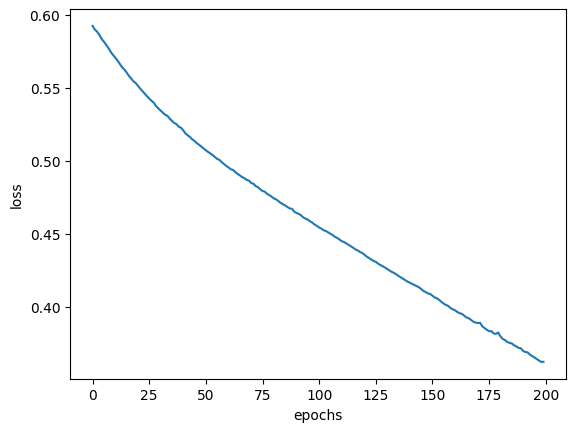

In [ ]:
import matplotlib.pyplot as plt
hist = model.fit(data, y_one_hot, epochs = 200, batch_size = 64, verbose=0)

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## Get the weights after training

In [ ]:
for layer in model.layers:
  print("Weights")
  print(layer.get_weights()[0])
  print("Bias")
  print(layer.get_weights()[1])

Weights
[[-1.6408670e-04 -3.3526051e-01 -1.3807110e-03  4.7344998e-02
   8.3901800e-02 -2.3335877e-01 -3.3670431e-01  1.7832698e-01
   1.7055261e-01  5.5031866e-01 -7.4623543e-01 -3.9893472e-01]
 [ 3.5580242e-01 -4.4990575e-01  1.0073407e-01  6.0489029e-01
  -9.4260804e-02 -5.5350655e-01 -7.5991732e-01  6.6699219e-01
   7.7876605e-02  5.7301116e-01 -5.2907950e-01 -6.7733735e-01]
 [ 4.1140312e-01  5.4758108e-01  4.8823699e-01 -5.5089629e-01
  -4.5776391e-01 -3.9944410e-01  9.5152777e-01 -6.3691443e-01
  -3.2381439e-01 -1.1534373e+00  1.1955061e+00  1.2640879e+00]
 [ 5.7145500e-01  8.6708939e-01 -4.0630308e-01 -2.9404527e-01
  -2.6796937e-02 -3.4364882e-01  4.0286341e-01 -6.0682994e-01
  -2.7516842e-01 -2.9654276e-01  7.5946987e-01 -8.2205363e-02]]
Bias
[-0.0186247  -0.09920536 -0.06178707  0.14109781  0.05620172  0.00225668
 -0.12741365  0.1631618   0.08419885  0.06804958 -0.12001649 -0.08910557]
Weights
[[-0.17670216  0.05812096  0.06808057  0.29966548 -0.15015425  0.34320268
   0.0473

# LAB

## 1. โหลดชุดข้อมูล breast-cancer-wisconsin-data  https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

![](https://miro.medium.com/max/720/1*pxFCmhRFTighUn88baLcSA.png)

In [ ]:
import pandas as pd                  ## Import Pandas lib to get data from external source

dataset = pd.read_csv('/content/data.csv') ## read data
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 2. สร้างชุดข้อมูลสำหรับฝึก (training data) และชุดข้อมูลทดสอบ (test dsata) โดยออกเป็น 80% และ 20% ตามลำดับ  พร้อมแสดงขนาดของ training data และ test data

In [ ]:
from sklearn.model_selection import train_test_split
dataset['diagnosis'].replace('M', 1, inplace=True)
dataset['diagnosis'].replace('B', 0, inplace=True)

target = dataset['diagnosis']                    ## pick up the column 'Outcome' for creating target label
input_data = dataset.drop(columns=['diagnosis','id','Unnamed: 32'])


X_train, X_test, Y_train, Y_test = train_test_split(input_data, target, test_size=0.20)
print('training data size : {} , test data size {}'.format(X_train.shape, X_test.shape))

training data size : (455, 30) , test data size (114, 30)


## 3. สร้างโมเดล perceptron โดยใช้ชุดข้อมูลฝึก กำหนดให้ learning rate = 0.001 โดยฝึกฝนทั้งหมด 100 รอบ รวมทั้ง plot กราฟ

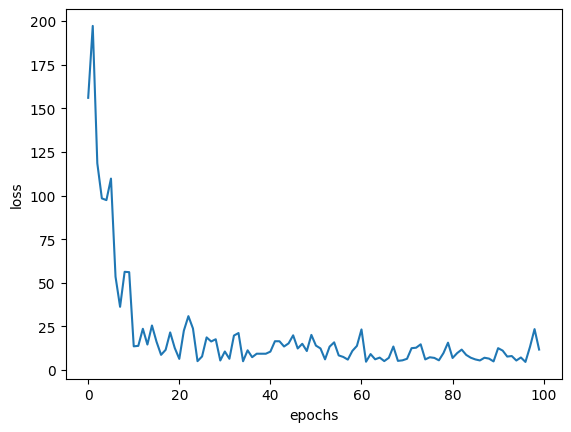

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt



model = Sequential()
model.add(Dense(1, input_shape=(30,), activation='sigmoid'))
new_SGD = SGD(learning_rate = 0.001)
model.compile(loss='binary_crossentropy', optimizer = new_SGD)



hist = model.fit(X_train , Y_train, epochs = 100, verbose=0)

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## 4. สร้างโมเดล MLP [ input layer (30) -> hidden layer (30) -> output layer (1) ] กำหนดให้ learning rate = 0.001 โดยฝึกฝนทั้งหมด 100 รอบ รวมทั้ง plot กราฟ

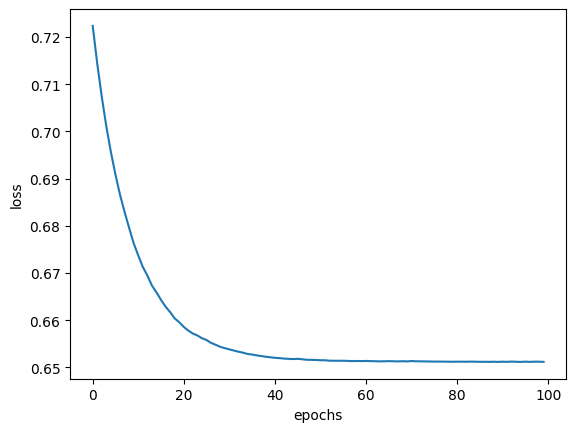

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt



model2 = Sequential()
model2.add(Dense(30, input_shape=(30,), activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
new_SGD = SGD(learning_rate = 0.001)
model2.compile(loss='binary_crossentropy', optimizer = new_SGD)



hist = model2.fit(X_train , Y_train, epochs = 100, verbose=0)

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## 5. ทดสอบโมเดล perceptron และ MLP ที่สร้างจากข้อ 3 และ 4 โดยใช้ชุดข้อมูลทดสอบ แสดงผลลัพธ์ความแม่นยำ (accuracy) ของทั้ง 2 โมเดล

In [ ]:

tol = model.evaluate(X_test, Y_test)

tol2 = model2.evaluate(X_test, Y_test)
print('total loss of perceptron : %.2f' % tol)
print('total loss of MLP : %.2f' % tol2)


4/4 [==============================] - 0s 5ms/step - loss: 0.6965
total loss of perceptron : 4.27
total loss of MLP : 0.70


# MNIST Handwritten Digit Classification

1. โหลดชุดข้อมูล MNIST จำนวน 60,000 ภาพระดับเทา (grayscale) โดยแต่ละภาพมีขนาด 28 x 28 แบ่งข้อมูลออกเป็น 50,000 สำหรับฝึกฝนโมเดล และ 10,000 สำหรับ ทดสอบโมเดล

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png" width="500" height="250">


In [ ]:
from tensorflow.keras.datasets import mnist                       ## load MNIST dataset from built-in Keras's API
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
convert_Xtrain = np.reshape(x_train,(60000,28*28))
convert_Xtest = np.reshape(x_test,(10000,28*28))
convert_Xtrain.shape
y_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)




11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### 2. ออกแบบโครงข่ายประสาทเทียมแบบ MLP โดยกำหนดให้ hidden layer = 250 units และ learning rate = 0.03

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt



model2 = Sequential()
model2.add(Dense(500, input_shape=(784,), activation='sigmoid'))
model2.add(Dense(10, input_shape=(784,), activation='sigmoid'))
new_SGD = SGD(learning_rate = 0.03)
model2.compile(loss='binary_crossentropy', optimizer = new_SGD)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. ฝึกโมเดลโครงข่ายประสาทเทียมในข้อ 2 โดยกำหนดให้ batch size = 64 และรอบในการฝึก (epoch) = 100 พร้อม plot graph แสดง loss ที่ได้ในแต่ละรอบ

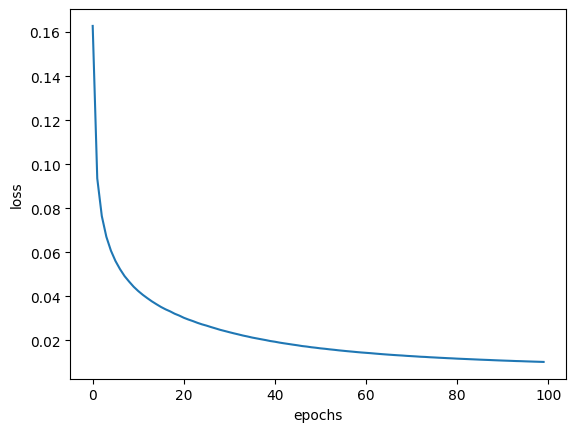

In [ ]:
import matplotlib.pyplot as plt
hist = model2.fit(convert_Xtrain , y_one_hot, batch_size = 64 ,epochs = 100, verbose=0)

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## 4. ทดสอบโมเดลที่ผ่านการฝึกในข้อ 3 โดยใช้ข้อมูลทดสอบ แสดงความแม่นยำบนชุดข้อมูลทดสอบ

In [ ]:


tol2 = model2.evaluate(convert_Xtest, y_test_one_hot)
tol2 = (1-tol2)*100
print('Accuracy on MNIST test data : %.2f' % tol2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0280
Accuracy on MNIST test data : 97.20
